In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Image #for importing the photos for comparison
import os
import glob
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
df_SXS_data = pd.read_csv('Compare/SXS_hMlR_data.csv')       #Lambda = 588
df_Whisky_data = pd.read_csv('Compare/Whisky_ALF2_data.csv') #Lambda = 591
df_THC_data = pd.read_csv('Compare/THC_BLh_data.csv')        #Lambda = 594
df_SACRA_data = pd.read_csv('Compare/SACRA_H_data.csv')      #Lambda = 607
df_BAM_data = pd.read_csv('Compare/BAM_MPA1_data.csv')       #Lambda = 609

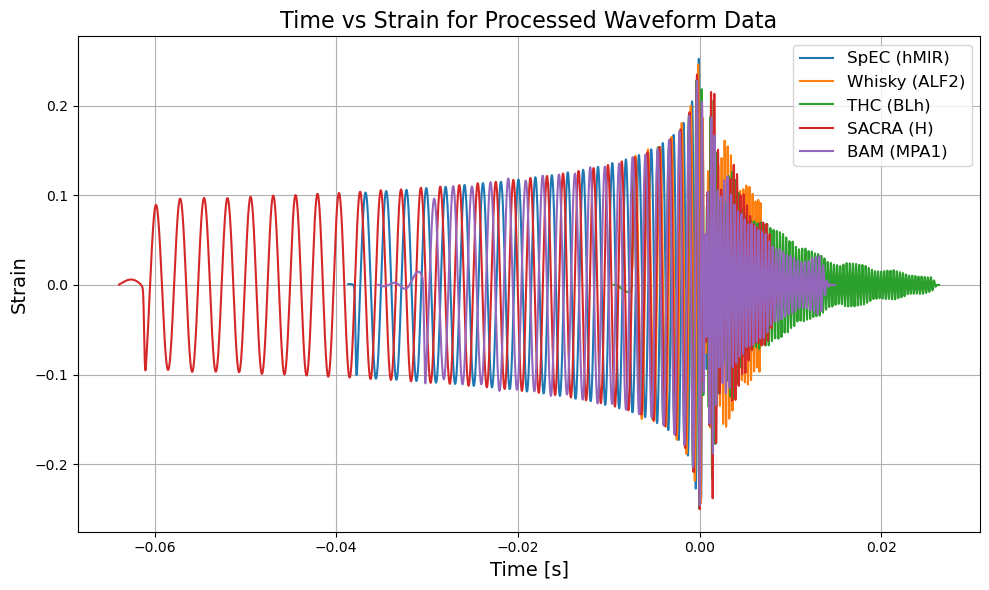

In [3]:
def plot_waveform_data(dfs, labels):
    plt.figure(figsize=(10, 6))  # Set figure size for a clear, publication-ready plot

    # Loop over each DataFrame and plot the corresponding data
    for df, label in zip(dfs, labels):
        plt.plot(df['time_sec'], df['Real_h'], label=label)  # Plot 'time' vs 'Amp'
    
    # Adding labels, title, and legend
    plt.xlabel('Time [s]', fontsize=14)
    plt.ylabel('Strain', fontsize=14)
    plt.title('Time vs Strain for Processed Waveform Data', fontsize=16)
    
    plt.legend(loc='best', fontsize=12)  # Add legend to distinguish datasets
    plt.grid(True)  # Add grid for better readability

    # Improving the appearance for a paper-ready plot
    plt.tight_layout()  # Automatically adjust layout to avoid overlap
    plt.savefig('waveform_plot.png', dpi=300)  # Save plot as high-resolution PNG
    plt.show()  # Show plot in the output

# Plot with loaded DataFrames
dfs = [df_SXS_data, df_Whisky_data, df_THC_data, df_SACRA_data, df_BAM_data]  # List of DataFrames
labels = ['SpEC (hMlR)', 'Whisky (ALF2)', 'THC (BLh)', 'SACRA (H)', 'BAM (MPA1)']  # Labels for each DataFrame
plot_waveform_data(dfs, labels)

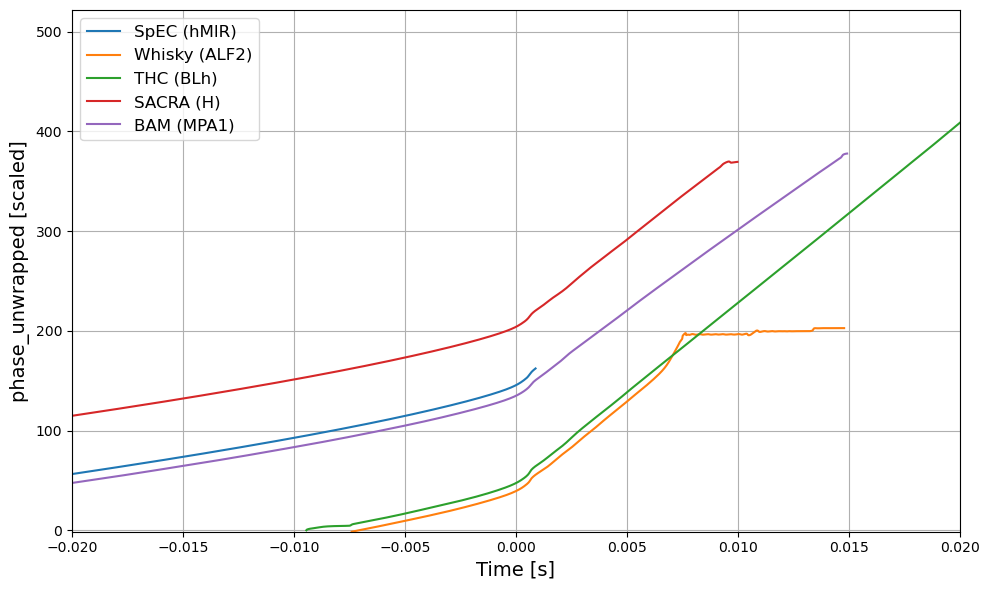

In [4]:
def plot_waveform_data_zoom(dfs, labels, y_var='Amplitude', zoom_range=(-0.05, 0.05), zoom_ylim=None):
    plt.figure(figsize=(10, 6))  # Set figure size for a clear, publication-ready plot

    # Loop over each DataFrame and plot the corresponding data
    for df, label in zip(dfs, labels):
        plt.plot(df['time_sec'], df[y_var], label=label)  # Plot 'time' vs 'Amp'
    
    # Adding labels, title, and legend
    plt.xlabel('Time [s]', fontsize=14)
    plt.ylabel(f'{y_var}' ' [scaled]', fontsize=14)
    #plt.title('Time vs Phase for Processed Waveform Data', fontsize=16)

    # Set the x-axis limits to zoom in on the specified range
    plt.xlim(zoom_range)
    if zoom_ylim:
        plt.ylim(zoom_ylim)
    else:
        plt.ylim([min([df[y_var].min() for df in dfs]), max([df[y_var].max() for df in dfs])])

    plt.legend(loc='best', fontsize=12)  # Add legend to distinguish datasets
    plt.grid(True)  # Add grid for better readability

    # Improving the appearance for a paper-ready plot
    plt.tight_layout()  # Automatically adjust layout to avoid overlap
    plt.savefig('waveform_plot.png', dpi=300)  # Save plot as high-resolution PNG
    plt.show()  # Show plot in the output

# Plot with loaded DataFrames
#dfs = [df_SXS_data, df_Whisky_data, df_THC_data, df_SACRA_data, df_BAM_data]  # List of DataFrames
#labels = ['SXS hMlR', 'Whisky ALF2', 'THC BLh', 'SACRA H', 'BAM MPA1']  # Labels for each DataFrame
plot_waveform_data_zoom(dfs, labels, y_var='phase_unwrapped', zoom_range=(-0.02, 0.02))

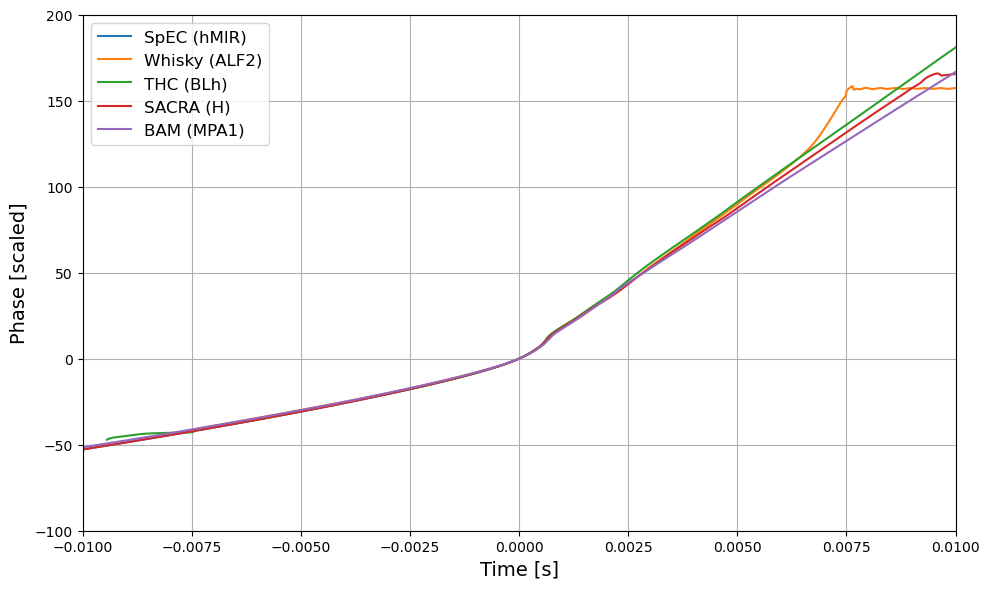

In [5]:
plot_waveform_data_zoom(dfs, labels, y_var='Phase', zoom_range=(-0.01, 0.01), zoom_ylim=(-100,200))

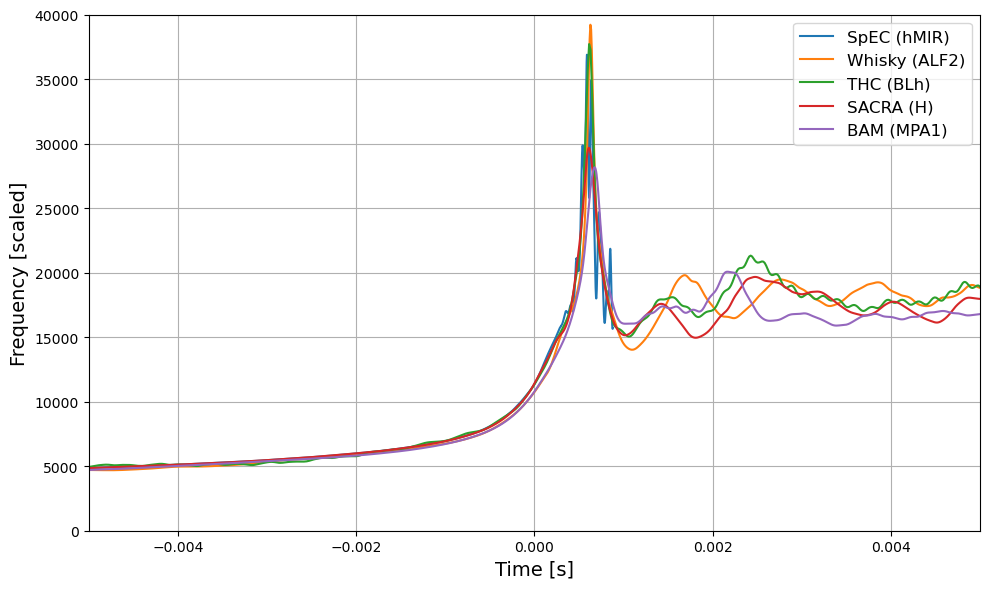

In [6]:
plot_waveform_data_zoom(dfs, labels, y_var='Frequency', zoom_range=(-0.005, 0.005), zoom_ylim=(0,40000))

In [7]:
def find_frequencies(dfs, labels, time_interval=(-0.0025, 0.0025)):
    t_min, t_max = time_interval  # Unpack the time interval

    for df, label in zip(dfs, labels):
        # Find the frequency at t = 0
        idx_t0 = np.argmin(np.abs(df['time_sec']))  # Closest index to t=0
        freq_at_t0 = df['Frequency'].iloc[idx_t0]
        Amp_at_t0 = df['Amplitude'].iloc[idx_t0]

        # Find the maximum frequency within the time interval
        df_interval = df[(df['time_sec'] >= t_min) & (df['time_sec'] <= t_max)]
        max_freq = df_interval['Frequency'].max()

        # Print the results for the current file
        print(f"File: {label}")
        print(f"  Amplitude at t=0: {Amp_at_t0}")
        print(f"  Frequency at t=0: {freq_at_t0}")
        print(f"  Maximum Frequency in interval ({t_min}, {t_max}): {max_freq}\n")

In [8]:
find_frequencies(dfs, labels, time_interval=(-0.0025, 0.0025))

File: SpEC (hMlR)
  Amplitude at t=0: 0.2538047883448281
  Frequency at t=0: 11344.867453217506
  Maximum Frequency in interval (-0.0025, 0.0025): 36884.82342660427

File: Whisky (ALF2)
  Amplitude at t=0: 0.2532773064954122
  Frequency at t=0: 10730.153240724
  Maximum Frequency in interval (-0.0025, 0.0025): 39206.09847073071

File: THC (BLh)
  Amplitude at t=0: 0.2497625141500576
  Frequency at t=0: 11326.18476043432
  Maximum Frequency in interval (-0.0025, 0.0025): 37705.7511932184

File: SACRA (H)
  Amplitude at t=0: 0.2502896793962152
  Frequency at t=0: 11394.730774492024
  Maximum Frequency in interval (-0.0025, 0.0025): 29667.802072823048

File: BAM (MPA1)
  Amplitude at t=0: 0.2459908098250674
  Frequency at t=0: 10769.598383553326
  Maximum Frequency in interval (-0.0025, 0.0025): 28155.47879712284



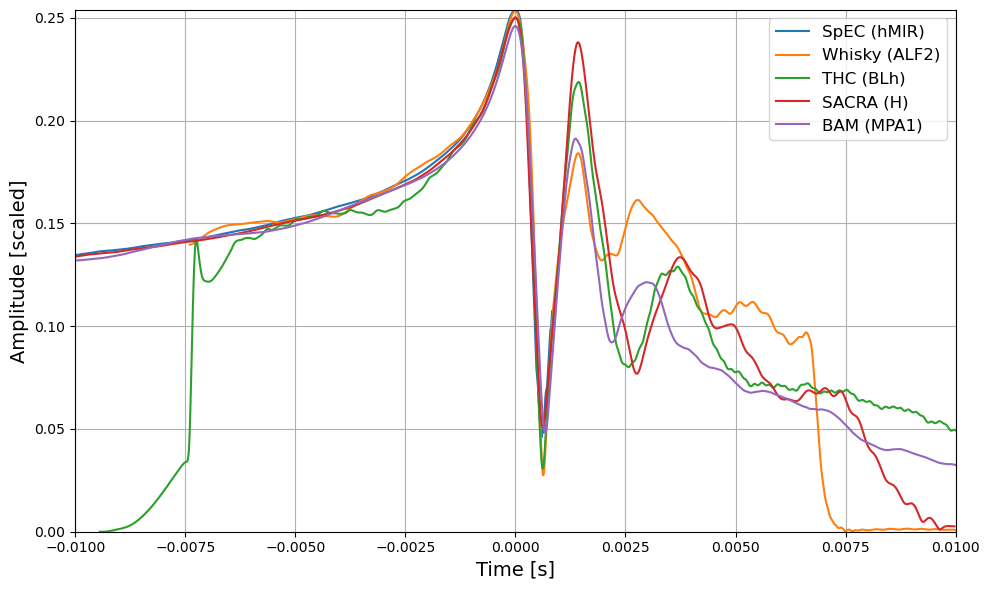

In [9]:
plot_waveform_data_zoom(dfs, labels, y_var='Amplitude', zoom_range=(-0.01, 0.01))

In [10]:
def plot_waveform_data_with_inset(dfs, labels, y_var='Amplitude', zoom_range=(-0.05, 0.05), zoom_ylim=None, save_as_pdf=True):
    fig, ax = plt.subplots(figsize=(10, 6))  # Main figure and axis

    # Loop over each DataFrame and plot the corresponding data
    for df, label in zip(dfs, labels):
        ax.plot(df['time_sec'], df[y_var], label=label)  # Plot 'time' vs 'Amp'

    # Adding labels, title, and legend for the main plot
    ax.set_xlabel('Time [s]', fontsize=14)
    ax.set_ylabel(f'{y_var}' ' [scaled]', fontsize=14)
   # ax.set_title('Time vs Amplitude for Processed Waveform Data', fontsize=16)
    ax.legend(loc='upper right', fontsize=12)  # Legend
    #ax.grid(True)

    # Create an inset for the zoomed-in region
    ax_inset = inset_axes(ax, width="100%", height="100%", 
                          bbox_to_anchor=(0.055, 0.5, 0.5, 0.5), bbox_transform=ax.transAxes, loc="upper left")  # Inset at upper left

    # Plot the same data in the inset but zoomed in on the specific range
    for df, label in zip(dfs, labels):
        ax_inset.plot(df['time_sec'], df[y_var], label=label)

    # Set the zoom range for the inset
    ax_inset.set_xlim(zoom_range)
    #ax_inset.set_ylim([min([df['Amp'].min() for df in dfs]), max([df['Amp'].max() for df in dfs])])

    # Set the zoom range for the y-axis (ylim), if provided
    if zoom_ylim:
        ax.set_ylim(zoom_ylim)
        ax_inset.set_ylim(zoom_ylim)
    else:
        ax.set_ylim([min([df[y_var].min() for df in dfs]), max([df[y_var].max() for df in dfs])])
        ax_inset.set_ylim([min([df[y_var].min() for df in dfs]), max([df[y_var].max() for df in dfs])])
    
    # Add labels to the inset
    ax_inset.set_xlabel('Time [s]', fontsize=10)
    #ax_inset.set_ylabel('Amplitude', fontsize=10)
    #ax_inset.grid(True)
    #ax_inset.set_title(f'Zoomed region: {zoom_range[0]}s to {zoom_range[1]}s', fontsize=10)

    # Improving the appearance for a paper-ready plot
    plt.tight_layout()

    # Save the plot as a PDF or PNG
    if save_as_pdf:
        plt.savefig('waveform_plot_with_inset.pdf', dpi=300, format='pdf')  # Save as PDF
    else:
        plt.savefig('waveform_plot_with_inset.png', dpi=300)  # Save as PNG

    plt.show()  # Display the plot

/var/folders/z_/8qxrc1dd5pb7vpgvv8k13j5h0000gn/T/ipykernel_8606/257073053.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


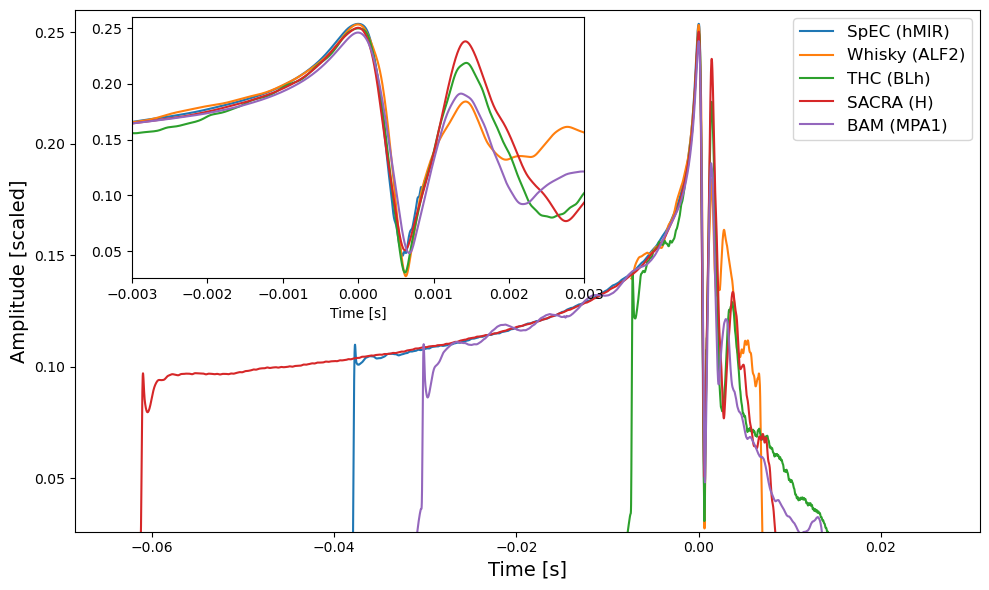

In [11]:
plot_waveform_data_with_inset(dfs, labels, y_var='Amplitude', zoom_range=(-0.003, 0.003), zoom_ylim=(0.026, 0.26), save_as_pdf=True)

/var/folders/z_/8qxrc1dd5pb7vpgvv8k13j5h0000gn/T/ipykernel_8606/257073053.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


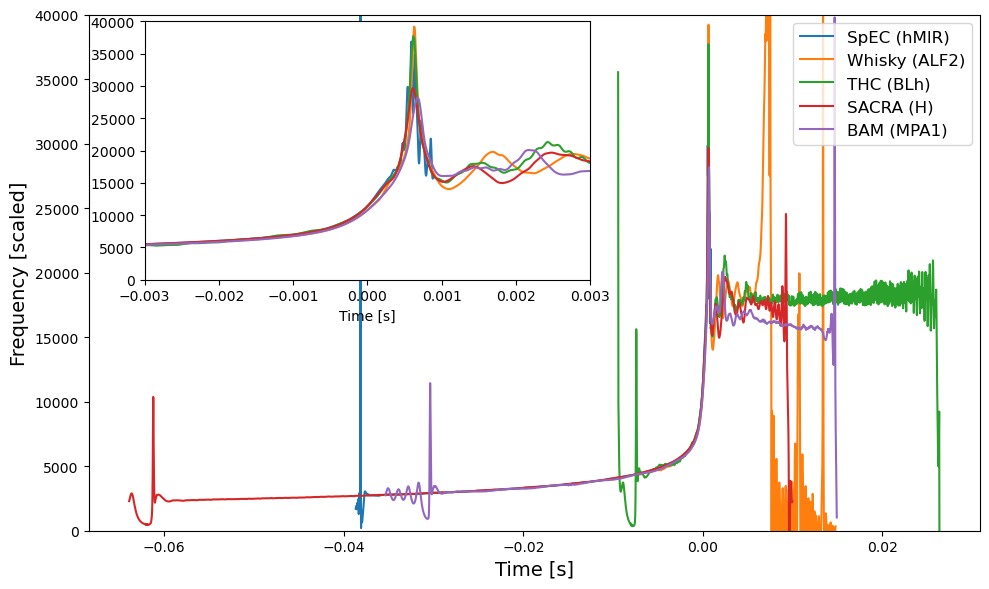

In [12]:
plot_waveform_data_with_inset(dfs, labels, y_var='Frequency', zoom_range=(-0.003, 0.003), zoom_ylim=(0,40000), save_as_pdf=True)

/var/folders/z_/8qxrc1dd5pb7vpgvv8k13j5h0000gn/T/ipykernel_8606/4136154302.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


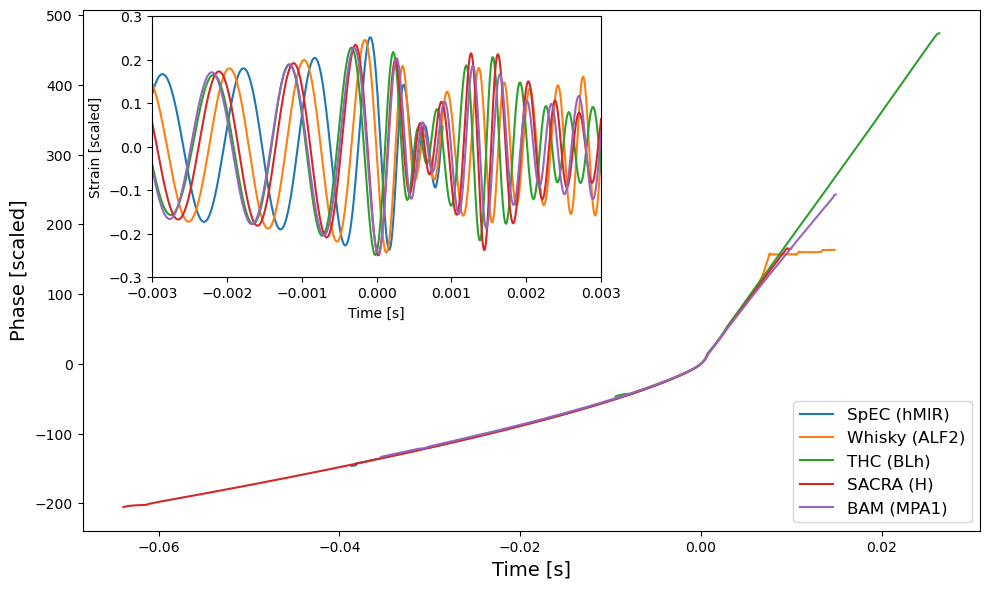

In [14]:
def plot_waveform_strain_with_phase(dfs, labels, zoom_range=(-0.05, 0.05), zoom_ylim=None, save_as_pdf=True):
    fig, ax = plt.subplots(figsize=(10, 6))  # Main figure and axis

    # Loop over each DataFrame and plot the corresponding data
    for df, label in zip(dfs, labels):
        ax.plot(df['time_sec'], df['Phase'], label=label)  # Plot 'time' vs 'Amp'

    # Adding labels, title, and legend for the main plot
    ax.set_xlabel('Time [s]', fontsize=14)
    ax.set_ylabel('Phase [scaled]', fontsize=14)
   # ax.set_title('Time vs Amplitude for Processed Waveform Data', fontsize=16)
    ax.legend(loc='lower right', fontsize=12)  # Legend
    #ax.grid(True)

    # Create an inset for the zoomed-in region
    ax_inset = inset_axes(ax, width="100%", height="100%", 
                          bbox_to_anchor=(0.07, 0.5, 0.5, 0.5), bbox_transform=ax.transAxes, loc="upper left")  # Inset at upper left

    # Plot the same data in the inset but zoomed in on the specific range
    for df, label in zip(dfs, labels):
        ax_inset.plot(df['time_sec'], df['Real_h'], label=label)

    # Set the zoom range for the inset
    ax_inset.set_xlim(zoom_range)
    #ax_inset.set_ylim([min([df['Amp'].min() for df in dfs]), max([df['Amp'].max() for df in dfs])])

    # Set the zoom range for the y-axis (ylim), if provided
    if zoom_ylim:
        ax_inset.set_ylim(zoom_ylim)
    else:
        ax_inset.set_ylim([min([df['Phase'].min() for df in dfs]), max([df['Phase'].max() for df in dfs])])
    
    # Add labels to the inset
    ax_inset.set_xlabel('Time [s]', fontsize=10)
    ax_inset.set_ylabel('Strain [scaled]', fontsize=10)
    #ax_inset.grid(True)
    #ax_inset.set_title(f'Zoomed region: {zoom_range[0]}s to {zoom_range[1]}s', fontsize=10)

    # Improving the appearance for a paper-ready plot
    plt.tight_layout()

    # Save the plot as a PDF or PNG
    if save_as_pdf:
        plt.savefig('waveform_strain_with_phase.pdf', dpi=300, format='pdf')  # Save as PDF
    else:
        plt.savefig('waveform_strain_with_phase.png', dpi=300)  # Save as PNG

    plt.show()  # Display the plot

plot_waveform_strain_with_phase(dfs, labels, zoom_range=(-0.003, 0.003), zoom_ylim=(-0.3,0.3), save_as_pdf=True)